# Solving Knapsack using GA

In [1]:
# Solve using GA in pymoo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination.default import DefaultSingleObjectiveTermination
from pymoo.core.problem import Problem
from pymoo.optimize import minimize

In [2]:
# Define the problem
class Knapsack(Problem):
    def __init__(self, weights, profits, capacity):
        super().__init__(n_var=len(weights), n_obj=1, n_constr=1, xl=0, xu=1, vtype=bool)
        self.weights = weights
        self.profits = profits
        self.capacity = capacity

    def _evaluate(self, x, out, *args, **kwargs):
        total_weight = np.sum(self.weights * x, axis=1)
        total_profit = np.sum(self.profits * x, axis=1)
        out["F"] = -total_profit[:, None]
        out["G"] = np.where(total_weight <= self.capacity, 0, total_weight - self.capacity)[:, None]

In [3]:
# # Read data from CSV file
# df = pd.read_csv('knapsack.csv')
# weights = df['Weight'].values
# profits = df['Profit'].values
# capacity = df['Capacity'].iloc[0]

# Define problem inputs
weights = np.array([10, 12, 15, 27, 30, 20, 7])
profits = np.array([2, 1, 3, 4, 1, 2, 1])
capacity = 50
df=pd.DataFrame({'Weight':weights,'Profit':profits,'Capacity':capacity})

# Define problem
problem = Knapsack(weights, profits, capacity)

# Define genetic algorithm
algorithm = GA(
    pop_size=200,
    sampling=FloatRandomSampling(),
    crossover=UniformCrossover(prob=1.0),
    mutation=PolynomialMutation(prob=0.5),
    eliminate_duplicates=True
)

termination = DefaultSingleObjectiveTermination()

# Run the optimization
res = minimize(problem, algorithm, termination, verbose=True)

# Print results
print(f"Best solution found: {res.X}")
print(f"Best objective value: {-res.F[0]}")

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |      200 |  0.000000E+00 |  1.193618E+01 | -5.197751E+00 | -7.470677E+00
     2 |      400 |  0.000000E+00 |  0.9722211578 | -5.062591E+00 | -7.470677E+00
     3 |      600 |  0.000000E+00 |  0.000000E+00 | -5.518513E+00 | -7.470677E+00
     4 |      800 |  0.000000E+00 |  0.000000E+00 | -6.031349E+00 | -7.848326E+00
     5 |     1000 |  0.000000E+00 |  0.000000E+00 | -6.469904E+00 | -7.848326E+00
     6 |     1200 |  0.000000E+00 |  0.000000E+00 | -6.793986E+00 | -7.851444E+00
     7 |     1400 |  0.000000E+00 |  0.000000E+00 | -7.065907E+00 | -7.997527E+00
     8 |     1600 |  0.000000E+00 |  0.000000E+00 | -7.247785E+00 | -8.104464E+00
     9 |     1800 |  0.000000E+00 |  0.000000E+00 | -7.406772E+00 | -8.289973E+00
    10 |     2000 |  0.000000E+00 |  0.000000E+00 | -7.539955E+00 | -8.289973E+00
    11 |     2200 |  0.000000E+00 |  0.000000E+00 | -7.683293E+00 | -8.289973E+00
    12 |     240

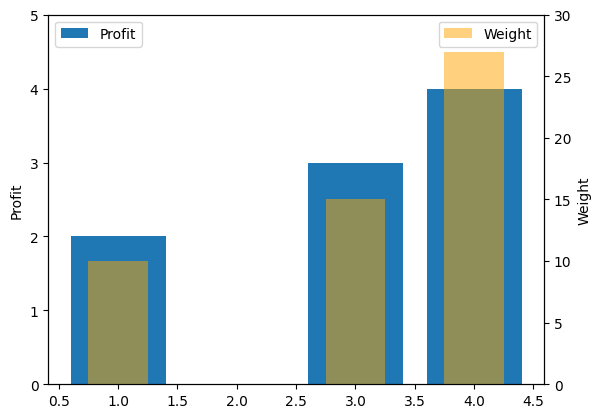

In [4]:
# Visualize solution
# selected_items = df.loc[np.where(res.X >=0.5)[0], :]
res_bool=np.round(res.X)
selected_items = df.loc[res_bool.astype(bool), :]

fig, ax1 = plt.subplots()
# Plot bar chart on axis #1
ax1.bar(1+selected_items.index, selected_items['Profit']) 
ax1.set_ylabel('Profit')
ax1.set_ylim(0, 5)
ax1.legend(['Profit'], loc="upper left")

# Set up the 2nd axis
ax2 = ax1.twinx()
# Plot bar chart on axis #2
ax2.bar(1+selected_items.index, selected_items['Weight'], width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Weight')
ax2.set_ylim(0, 30)
ax2.legend(['Weight'], loc="upper right")
plt.show()

In [5]:
# Print total weight and value of selected items
total_weight = selected_items['Weight'].sum()
total_profit = selected_items['Profit'].sum()
print(f"Total weight of selected items: {total_weight}")
print(f"Total profit of selected items: {total_profit}")
print("The selected items:\n", selected_items)

Total weight of selected items: 52
Total profit of selected items: 9
The selected items:
    Weight  Profit  Capacity
0      10       2        50
2      15       3        50
3      27       4        50
